# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
 
len(cities)

633

In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
query = f"{url}appid={api_key}&units={units}&q="

In [6]:
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []
country_codes = []
city_name=[]


for x in range(0, len(cities)):
    response = requests.get(f"{query}{cities[x]}").json()
    if response["cod"] == "404":
        print("City not found")
    
    else:
        city_name.append(cities[x])
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
        country_codes.append(response['sys']["country"])
        cloudiness.append(response['clouds']['all'])
    
        
  
    print(f"Processing record {x + 1} | {cities[x]}")



Processing record 1 | busselton
Processing record 2 | xichang
Processing record 3 | nyurba
Processing record 4 | genhe
Processing record 5 | onega
Processing record 6 | verkhnyaya inta
Processing record 7 | henties bay
Processing record 8 | ushuaia
Processing record 9 | hobart
Processing record 10 | worland
Processing record 11 | cape town
Processing record 12 | sun valley
Processing record 13 | punta arenas
Processing record 14 | gombong
Processing record 15 | tasiilaq
Processing record 16 | qaanaaq
Processing record 17 | monrovia
Processing record 18 | saint-joseph
Processing record 19 | mataura
Processing record 20 | guerrero negro
Processing record 21 | mar del plata
City not found
Processing record 22 | umzimvubu
Processing record 23 | tadine
Processing record 24 | alice springs
Processing record 25 | talaya
Processing record 26 | port alfred
Processing record 27 | faanui
Processing record 28 | rikitea
Processing record 29 | ponta do sol
Processing record 30 | hermanus
Processing 

Processing record 236 | shubarkuduk
City not found
Processing record 237 | tarudant
Processing record 238 | keetmanshoop
Processing record 239 | ranong
Processing record 240 | cidreira
Processing record 241 | chuy
Processing record 242 | fortuna
Processing record 243 | leningradskiy
Processing record 244 | ixtapa
Processing record 245 | truth or consequences
Processing record 246 | dhankuta
Processing record 247 | kodiak
Processing record 248 | east london
City not found
Processing record 249 | taburi
Processing record 250 | rocha
Processing record 251 | malindi
Processing record 252 | codrington
Processing record 253 | dalbandin
Processing record 254 | vardo
Processing record 255 | port macquarie
Processing record 256 | rafaela
Processing record 257 | dingle
Processing record 258 | nagapattinam
Processing record 259 | foki
Processing record 260 | sorland
City not found
Processing record 261 | mergui
Processing record 262 | takoradi
Processing record 263 | pasvalys
Processing record 26

Processing record 476 | rundu
Processing record 477 | pangkalanbuun
Processing record 478 | hokitika
City not found
Processing record 479 | ahumada
Processing record 480 | craig
Processing record 481 | heihe
Processing record 482 | duvan
Processing record 483 | dong xoai
Processing record 484 | karratha
Processing record 485 | yatou
Processing record 486 | koumac
Processing record 487 | colesberg
Processing record 488 | ugoofaaru
Processing record 489 | merauke
Processing record 490 | jacareacanga
Processing record 491 | sinnamary
Processing record 492 | paita
Processing record 493 | goya
Processing record 494 | mbandaka
Processing record 495 | tevriz
Processing record 496 | mnogovershinnyy
Processing record 497 | anahuac
Processing record 498 | dryden
Processing record 499 | vanimo
Processing record 500 | kaberamaido
Processing record 501 | belyy yar
Processing record 502 | okhotsk
City not found
Processing record 503 | barentsburg
Processing record 504 | san benito
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({"City": city_name,
                           "Cloudiness": cloudiness,
                           "Country": country_codes,
                           "Date": dates,
                           "Humidity": humidity,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Max Temp": temperature,
                           "Wind Speed": wind_speed})

weather_df.to_csv("Cites_Data.csv")

weather_df.head()


NameError: name 'city_name' is not defined

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

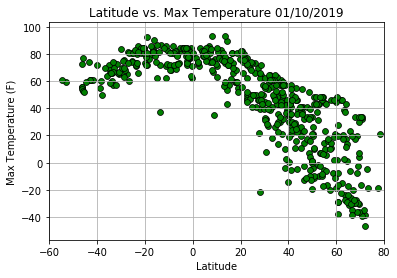

In [31]:
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'green', s=35)



plt.title(f"Latitude vs. Max Temperature {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid(True)

# Modify ticks
plt.xlim(-60,80)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)


plt.savefig("Latitude_vs_Max_Temperature")



plt.show()


#### Latitude vs. Humidity Plot

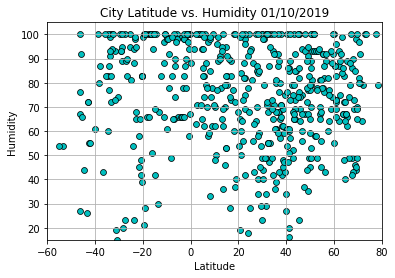

<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(x = weather_df["Latitude"], y = weather_df["Humidity"],
            linewidths = 0.75, edgecolors = 'black', color = 'c', s=35)

plt.title(f"City Latitude vs. Humidity {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([15,105])



plt.show()

plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

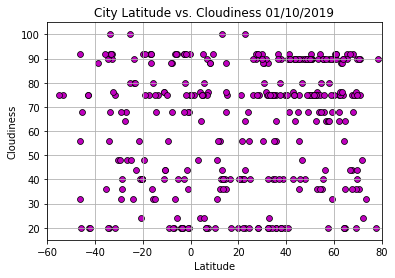

In [33]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"],
           linewidths = 0.75, edgecolors = 'black', color = 'm', s=35)

plt.title(f"City Latitude vs. Cloudiness {datetime.datetime.now().strftime('%m/%d/%Y')}")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([15,105])

plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

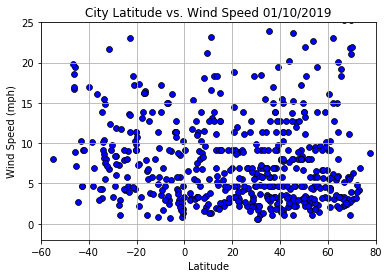

In [36]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"],
            linewidths = 0.75, edgecolors = 'black', color = 'b', s=35)

plt.title(f"City Latitude vs. Wind Speed {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-2,25])

plt.savefig("Latitude_vs_WindSpeed.png")

plt.show()

#### Analysis
    -All the cities nearest to the Latitude 0 have the same temperature than the cities to the extremes.
    -There are no relationship between Latitude and Wind Speed. It depends of each city and their geographical enviroment.
    -There are no relationship between Latitude and Humidity. But most of the cities with high temperature have more percentage of humidity 
    